<a href="https://colab.research.google.com/github/Equipe16-IAA/IAA012-FrameworksIA/blob/main/02_Regrecao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 02 - Regressão

---

---
# Prática 1: Predição de vinho

#### 1. Importação das bibliotecas

In [57]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.python.keras import backend
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

In [58]:
# Verificar versão do TensorFlow
tf.__version__

'2.17.1'

#### 2. Importação dos dados

In [99]:
from sklearn.datasets import load_wine

data = load_wine()

print(data.keys())
print(data['target'])

X = data['data']
Y = data['target']

print(X.shape)
print(Y.shape)

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
(178, 13)
(178,)


#### 3. Separação da base em treino e teste (75/25)

In [83]:
x_train, x_test, y_train, y_test = train_test_split(X, Y,
                                      test_size=0.25)

#### 4. Criação do modelo

In [102]:
# 3 camadas
i = tf.keras.layers.Input(shape=(13,))
x = tf.keras.layers.Dense(50, activation="relu")(i)
x = tf.keras.layers.Dense(1)(x)

model = tf.keras.models.Model(i, x)




#### 5. Compilação e treinamento do modelo

In [125]:
# Criação de funções para as métricas R2 e RMSE serem inseridas no modelo
def rmse(y_true, y_pred):
  return sqrt(mean_squared_error(y_true, y_pred))

def r2(y_true, y_pred):
  return r2_score(y_true, y_pred)

In [129]:
# Compilação
optimizer=tf.keras.optimizers.Adam(learning_rate=0.05)
# optimizer=tf.keras.optimizers.SGD(learning_rate=0.2, momentum=0.5)
# optimizer=tf.keras.optimizers.RMSprop(0.01)

model.compile(optimizer=optimizer,
              loss="mse",
              metrics=['accuracy'])

In [127]:
# Early stop para epochs
early_stop = tf.keras.callbacks.EarlyStopping(
                            monitor='val_loss',
                            patience=20,
                            restore_best_weights=True)

In [130]:
r = model.fit(x_train, y_train,
              epochs=1500,
              validation_data=(x_test, y_test),
              callbacks=[early_stop])

Epoch 1/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 11s 153ms/step - accuracy: 0.5534 - loss: 19.7140 - val_accuracy: 0.3111 - val_loss: 0.7284
Epoch 2/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4415 - loss: 0.6586 - val_accuracy: 0.3111 - val_loss: 0.7587
Epoch 3/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.4198 - loss: 0.6659 - val_accuracy: 0.3111 - val_loss: 0.7667
Epoch 4/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4280 - loss: 0.6906 - val_accuracy: 0.3111 - val_loss: 0.7598
Epoch 5/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4358 - loss: 0.6487 - val_accuracy: 0.3111 - val_loss: 0.7445
Epoch 6/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.4245 - loss: 0.6516 - val_accuracy: 0.3111 - val_loss: 0.7258
Epoch 7/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4245 - loss: 0.6649 - val_accuracy: 0.3111 - val_loss: 0.7080
Epoch 8/1500
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.4636 - loss: 0.5793 - val_accuracy: 0.3111 - va

#### 6. Avaliação do modelo

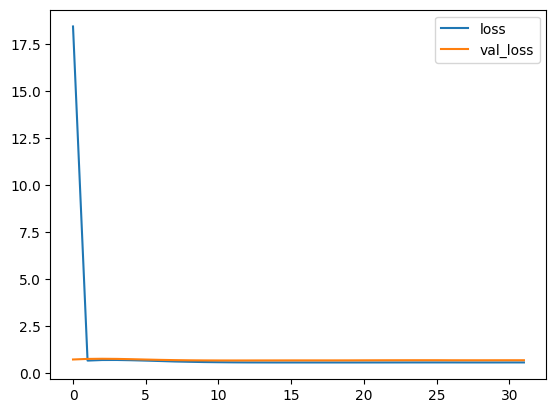

In [131]:
plt.plot( r.history["loss"], label="loss" )
plt.plot( r.history["val_loss"], label="val_loss" )
plt.legend()


In [132]:

plt.plot( r.history["rmse"], label="rmse" )
plt.plot( r.history["val_rmse"], label="val_rmse" )
plt.legend()


KeyError: 'rmse'

In [121]:
plt.plot( r.history["r2"], label="r2" )
plt.plot( r.history["val_r2"], label="val_r2" )
plt.legend()

KeyError: 'r2'

#### 7. Predições

In [122]:
# Predição
y_pred = model.predict(x_test).flatten()

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


In [123]:
# Cálculo das métricas de acurácia: mse, r2 e rmse
mse  = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)
r2   = r2_score(y_test, y_pred)

In [124]:
# Resultados das métricas de acurácia
print("mse     = ", mse)
print("rmse    = ", rmse)
print("r2      = ", r2)

mse     =  0.09673949896516798
rmse    =  0.3110297396796132
r2      =  0.8570091724395752


---

# Fim do código